## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Initial Analysis

In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
fraud_data['Undergrad'] = fraud_data['Undergrad'].apply(lambda x: 1 if x =='YES' else 0)
fraud_data['Urban'] = fraud_data['Urban'].apply(lambda x: 1 if x =='YES' else 0)
fraud_data['Taxable.Income'] = fraud_data['Taxable.Income'].apply(lambda x: 'Risky' if x>30000  else 'Good')

In [10]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,Risky,50047,10,1
1,1,Divorced,Risky,134075,18,1
2,0,Married,Risky,160205,30,1
3,1,Single,Risky,193264,15,1
4,0,Married,Risky,27533,28,0


In [11]:
fraud_data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [12]:
fraud_data['Marital.Status'] = fraud_data['Marital.Status'].map({'Single':1, 'Married':2, 'Divorced':3})

In [14]:
fraud_data['Marital.Status'].value_counts()

1    217
2    194
3    189
Name: Marital.Status, dtype: int64

array([[<AxesSubplot:title={'center':'Undergrad'}>,
        <AxesSubplot:title={'center':'Marital.Status'}>],
       [<AxesSubplot:title={'center':'City.Population'}>,
        <AxesSubplot:title={'center':'Work.Experience'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>]],
      dtype=object)

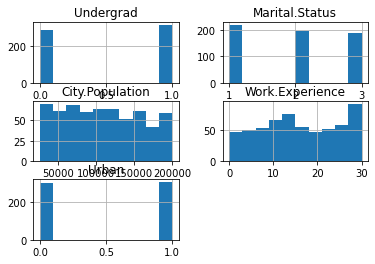

In [16]:
fraud_data.hist()

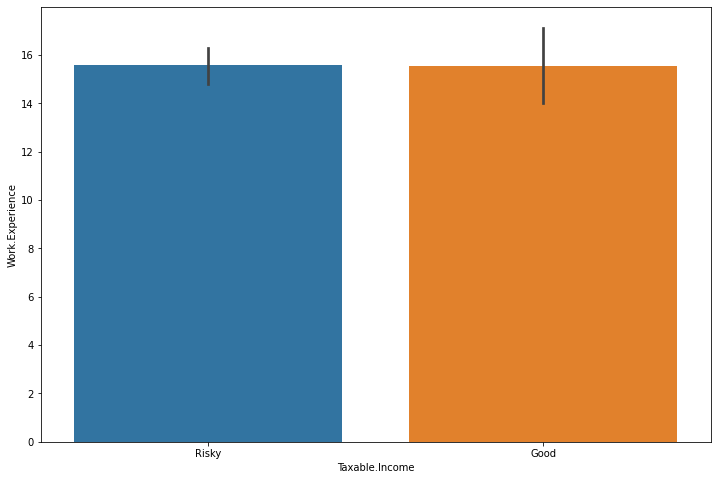

In [17]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Taxable.Income', y = 'Work.Experience', data = fraud_data)
plt.show()

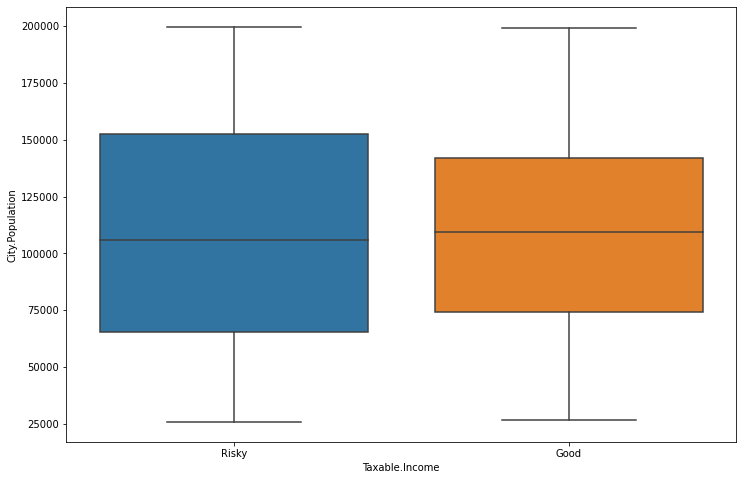

In [18]:
plt.figure(figsize = (12,8))
sns.boxplot(x ='Taxable.Income', y = 'City.Population', data = fraud_data)
plt.show()


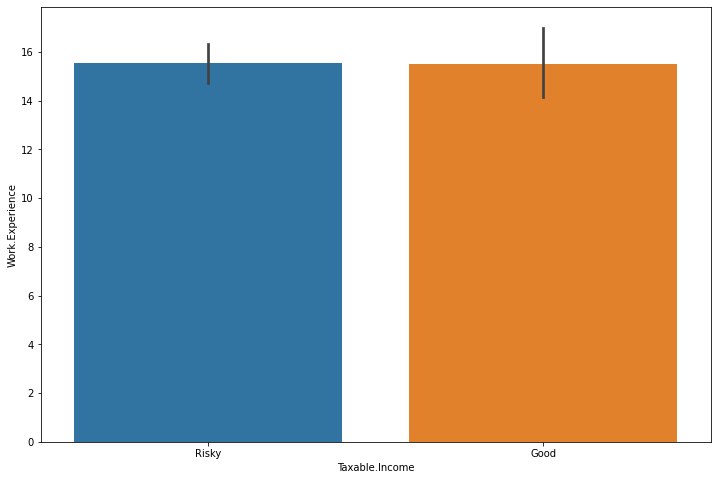

In [19]:
plt.figure(figsize = (12,8))
sns.barplot(x ='Taxable.Income', y = 'Work.Experience', data = fraud_data)
plt.show()

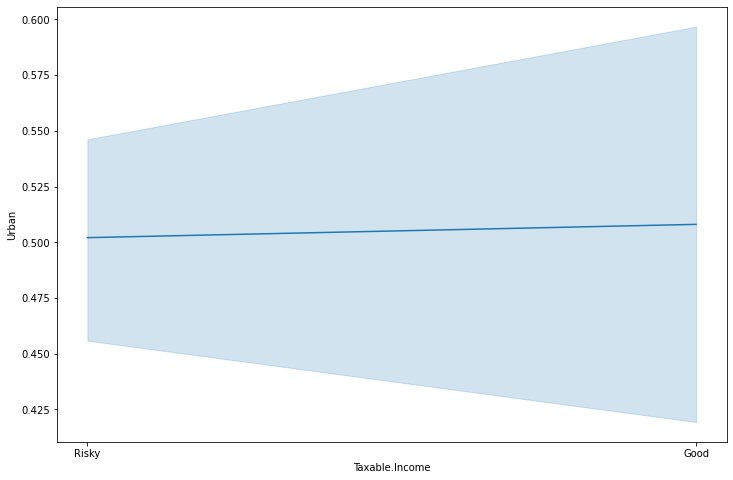

In [20]:
plt.figure(figsize = (12,8))
sns.lineplot(x ='Taxable.Income', y = 'Urban', data = fraud_data)
plt.show()

In [22]:
# Train test the data

train = fraud_data.drop('Taxable.Income',axis=1)
test = fraud_data['Taxable.Income']

In [24]:
## Train Test :

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.3,random_state = 1)

In [26]:
# Standardize the data using StandardScaler 

In [27]:
scaler = StandardScaler()

In [28]:
col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
X_train = pd.DataFrame(X_train, columns=col)
X_test = pd.DataFrame(X_test, columns=col)

In [30]:
X_train.shape  , X_test.shape

((420, 5), (180, 5))

## Build Random forest

In [31]:
rf_model = RandomForestClassifier(n_estimators= 100)

In [32]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
rf_model_pred = rf_model.predict(X_test)
rf_model_actual_predict = pd.DataFrame({'Actual': y_test, 'Predict': rf_model_pred})

In [34]:
rf_model_actual_predict[20:40]

,Actual,Predict
13,Risky,Risky
510,Risky,Risky
268,Risky,Risky
358,Risky,Risky
289,Risky,Risky
483,Good,Risky
429,Risky,Risky
47,Risky,Risky
223,Risky,Risky
185,Risky,Risky


In [35]:
rf_model.score(X_test, y_test)*100

77.77777777777779

## Apply Bagging for Classification

In [37]:
bg = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features =1.0, n_estimators = 100, random_state=8)

In [38]:
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=100, random_state=8)

In [39]:
bg_pred = bg.predict(X_test)

In [41]:
bg_actual_pred = pd.DataFrame({'Actual':y_test, 'Pridict': bg_pred})

In [42]:
bg_actual_pred[:10]

,Actual,Pridict
446,Good,Risky
404,Risky,Risky
509,Good,Risky
455,Risky,Risky
201,Risky,Risky
23,Risky,Risky
415,Risky,Risky
548,Risky,Risky
66,Risky,Risky
165,Risky,Risky


In [43]:
bg.score(X_test, y_test)

0.7888888888888889

##  AdaBoost Classification

In [45]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, learning_rate=1)

In [46]:
boost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [47]:
boost_pred = boost.predict(X_test)

In [48]:
boost_actual_predict = pd.DataFrame({"Actual": y_test, 'Predict': boost_pred})

In [49]:
boost_actual_predict[:10]

,Actual,Predict
446,Good,Good
404,Risky,Good
509,Good,Risky
455,Risky,Risky
201,Risky,Risky
23,Risky,Risky
415,Risky,Risky
548,Risky,Good
66,Risky,Risky
165,Risky,Good


In [50]:
boost.score(X_test, y_test)

0.6611111111111111

## Using K - Fold 

In [51]:
kfold = KFold(n_splits=10)

In [52]:
num_trees = 100
max_feature = 3

In [57]:
rfc = RandomForestClassifier(n_estimators=num_trees, max_features= max_feature)


In [58]:
rfc = cross_val_score(rfc, train , test, cv = kfold)

In [59]:
rfc

array([0.78333333, 0.73333333, 0.68333333, 0.7       , 0.73333333,
       0.63333333, 0.85      , 0.7       , 0.75      , 0.86666667])

In [60]:
rfc.mean()*100

74.33333333333334

In [61]:
rfc.std()*100

6.920179830675566